# This is the in situ and SSS collocation code. 


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import xarray as xr
import scipy
from glob import glob
import cartopy.crs as ccrs
from pyresample.geometry import AreaDefinition
from pyresample import image, geometry, load_area, save_quicklook, SwathDefinition
from pyresample.kd_tree import resample_nearest


# Read in USV data
Read in the Saildrone USV file either from a local disc or using OpenDAP.



In [147]:
#filename_usv='f:/data/cruise_data/saildrone/baja-2018/saildrone-gen_4-baja_2018-sd1002-20180411T180000-20180611T055959-1_minutes-v1.nc'
filename_usv='f:/data/cruise_data/saildrone/baja-2018/saildrone-gen_4-baja_2018-sd1002-20180411T180000-20180611T055959-1_minutes-v1.nc'
ds_usv = xr.open_dataset(filename_usv)
ds_usv.close()
ds_usv = ds_usv.isel(trajectory=0).swap_dims({'obs':'time'}).rename({'longitude':'lon','latitude':'lat'})
ds_usv = ds_usv.sel(time=slice('2018-04-12T02','2018-06-10T18')) #get rid of last part and first part where USV being towed
ds_usv['lon'] = ds_usv.lon.interpolate_na(dim='time',method='linear') #there are 6 nan values
ds_usv['lat'] = ds_usv.lat.interpolate_na(dim='time',method='linear')
ds_usv['wind_speed']=np.sqrt(ds_usv.UWND_MEAN**2+ds_usv.VWND_MEAN**2)
ds_usv['wind_dir']=np.arctan2(ds_usv.VWND_MEAN,ds_usv.UWND_MEAN)*180/np.pi
ds_usv

<xarray.Dataset>
Dimensions:               (time: 85980)
Coordinates:
    trajectory            float32 1002.0
  * time                  (time) datetime64[ns] 2018-04-12T02:00:00 ... 2018-06-10T18:59:00
    lat                   (time) float64 37.51 37.51 37.51 ... 37.68 37.68 37.68
    lon                   (time) float64 -122.8 -122.8 -122.8 ... -122.7 -122.7
Data variables:
    SOG                   (time) float64 ...
    COG                   (time) float64 ...
    HDG                   (time) float64 ...
    HDG_WING              (time) float64 ...
    ROLL                  (time) float64 ...
    PITCH                 (time) float64 ...
    WING_ANGLE            (time) float64 ...
    BARO_PRES_MEAN        (time) float64 ...
    BARO_PRES_STDDEV      (time) float64 ...
    TEMP_AIR_MEAN         (time) float64 ...
    TEMP_AIR_STDDEV       (time) float64 ...
    RH_MEAN               (time) float64 ...
    RH_STDDEV             (time) float64 ...
    TEMP_IR_UNCOR_MEAN    (time) fl

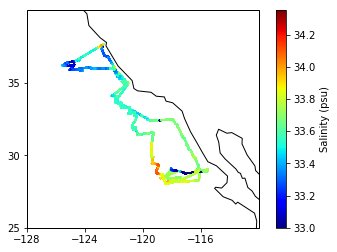

In [51]:
ax = plt.axes(projection=ccrs.PlateCarree())
cs1 = ax.scatter(ds_usv.lon, ds_usv.lat, s=3.0, c=ds_usv.SAL_MEAN, edgecolor='none', cmap='jet',vmin=33,vmax=34.35)
ax.coastlines()
x1,x2,y1,y2 = -128,-112,25,40
ax.set_xlim(x1,x2)
ax.set_ylim(y1,y2)
ax.set_xticks(np.arange(x1,x2,4))
ax.set_yticks(np.arange(y1,y2,5))
cax = plt.colorbar(cs1)
cax.set_label('Salinity (psu)')
fig_fname = 'C:/Users/gentemann/Google Drive/f_drive/docs/projects/SSS/figures/baja_location.png'
plt.savefig(fig_fname, transparent=False, format='png')